In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/Users/rupertmenneer/Documents/git/bayesian_flow/')

This example is 1 DIMENSIONAL (D), with 16 BINS (K)

torch.Size([1024])


(array([ 17.,  99., 184., 157.,  49.,  13.,   4.,  38.,  60.,  67., 113.,
         83.,  77.,  37.,  16.,  10.]),
 array([-0.9375   , -0.8203125, -0.703125 , -0.5859375, -0.46875  ,
        -0.3515625, -0.234375 , -0.1171875,  0.       ,  0.1171875,
         0.234375 ,  0.3515625,  0.46875  ,  0.5859375,  0.703125 ,
         0.8203125,  0.9375   ]),
 <BarContainer object of 16 artists>)

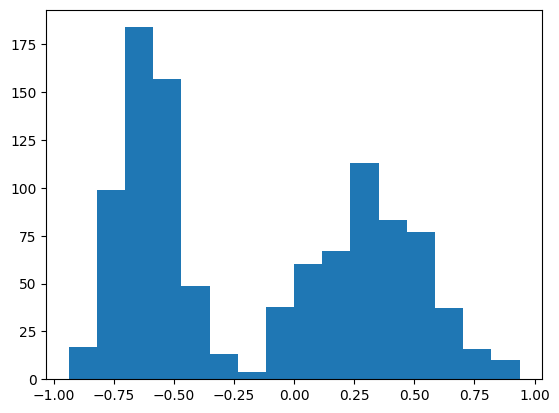

In [4]:
from discretised.bfn_discretised_data import DiscretisedBimodalData
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch

dataset = DiscretisedBimodalData(k=16)
dataloader = DataLoader(dataset, batch_size=1024, shuffle=True)
batch = next(iter(dataloader))
print(batch.shape)
plt.hist(batch.numpy(), bins=16)

In [8]:
k_ = torch.linspace(1, 16, 16)

print(((2 * k_ - 1)/16) - 1)

tensor([-0.9375, -0.8125, -0.6875, -0.5625, -0.4375, -0.3125, -0.1875, -0.0625,
         0.0625,  0.1875,  0.3125,  0.4375,  0.5625,  0.6875,  0.8125,  0.9375])


In [14]:
output_probs = torch.ones((16, 16))/16

k_hat = torch.sum(k_*output_probs, dim=-1)

print(k_hat.shape)

torch.Size([16])


In [ ]:
k_c = torch.sum(output_distribution*k_c, dim=-1)

In [ ]:
sigmoid, softmax = [],[]
for p in torch.linspace(0, 1, 100):
    a = [p, 1-p]
    softmax_a = torch.nn.functional.softmax(torch.tensor(a), dim=0)
    sigmoid_a = torch.sigmoid(torch.tensor(a))
    sigmoid_a[1] = 1-sigmoid_a[0]
    sigmoid.append(sigmoid_a)
    softmax.append(softmax_a)

plt.plot(torch.linspace(0, 1, 100), sigmoid, label='sigmoid', linestyle='--')
plt.plot(torch.linspace(0, 1, 100), softmax, label='softmax')
plt.xlabel('p')
plt.legend()

In [ ]:
from bfn import BayesianFlowNetwork
from models import SimpleNeuralNetwork
from torch.optim import AdamW
from bfn_discrete_data import BinaryData, BinaryDataLoader
import matplotlib.pyplot as plt
dataset = BinaryData(1000, 2)
dataloader = BinaryDataLoader(dataset, batch_size=100, shuffle=True)
bfn_model = BayesianFlowNetwork(SimpleNeuralNetwork(), 2)
optim = AdamW(bfn_model.parameters(), lr=3e-4, betas=(0.9, 0.98), weight_decay=0.01)

epochs = 100
losses = []
for i in range(epochs):
    for _, batch in enumerate(dataloader):
        optim.zero_grad()
        loss = bfn_model.continuous_time_loss_for_discrete_data(batch)
        loss.backward()
        optim.step()
        losses.append(loss.item())
    print(f'Epoch {i+1}/{epochs}, Loss: {loss.item()}')

In [ ]:
plt.plot(losses)

In [ ]:
samples = bfn_model.sample_generation_for_discrete_data(n_steps=10).to(torch.float32)
samples = samples + torch.randn_like(samples)*0.1
plt.scatter(0, 1, c='r')
plt.scatter(1, 0, c='r')
plt.scatter(samples[:, 0], samples[:, 1])

In [ ]:
 ls ../bfn_github/

In [ ]:

from bfn_github.bfn import BayesianFlowNetwork
import torch
# network should learn:
# when x0 = 0, x1 = 1
# when x0 = 1, x1 = 0
def get_datapoint(batch=128, device='cpu'):
    x0 = torch.randint(0, 2, size=(batch,), dtype=torch.bool, device=device)
    x1 = ~x0

    X = torch.stack([x0, x1], dim=0)
    return X.long().transpose(0, 1)

X = get_datapoint()  # (B, D=2) with K=2 classes 
print(X.shape)
# plt.title("Dataset")
# plt.scatter(X[:, 0], X[:, 1]);
# plt.grid()

from torch.optim import AdamW
from tqdm.auto import tqdm

bfn = BayesianFlowNetwork()

optim = AdamW(bfn.parameters(), lr=1e-2)


n = 1000
losses = []
for i in tqdm(range(n)):
    optim.zero_grad()
    X = get_datapoint(device='cpu')
    loss = bfn.process(X)
    loss.backward()
    optim.step()
    losses.append(loss.item())

bfn.sample(16)

In [ ]:
torch.nn.functional.one_hot(torch.tensor([2, 1]).unsqueeze(0), num_classes=3)